In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('iris1.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

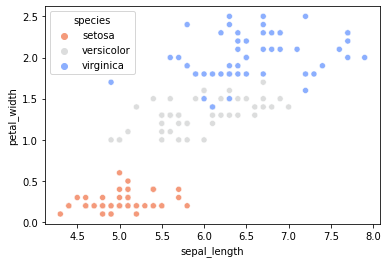

In [4]:
sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue=df.species, palette='coolwarm_r')

In [5]:
from sklearn.cluster import KMeans

X = df[['sepal_length', 'petal_width']]
km = KMeans(n_clusters=3, n_init=3, init='random', random_state=42)
km.fit(X)
y_kmeans = km.predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0])

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

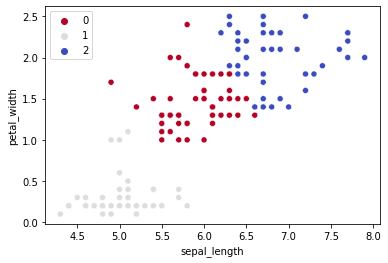

In [6]:
sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue=y_kmeans, palette='coolwarm_r')

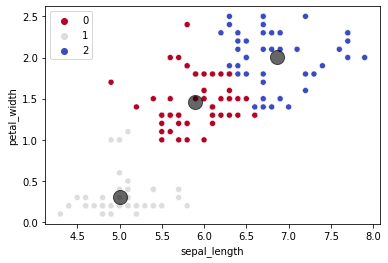

In [7]:
sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue=y_kmeans, palette='coolwarm_r')
centers = km.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)

In [8]:
km.inertia_

# inertia değerinin küçük olması, kümelenmenin merkez etrafında yoğunlaştığı anlamına gelir
# inertia değerinin büyük olması, kümelenmenin merkez etrafında geniş bir alana yayıldığı anlamına gelir

32.73746031746032

In [9]:
newdata = [[4.7, 0.8]]
y_pred = km.predict(newdata)
y_pred

array([1])

***elbow method***

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

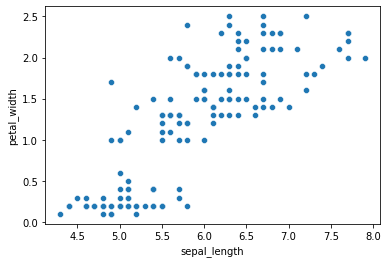

In [10]:
sns.scatterplot(data=df, x='sepal_length', y='petal_width')

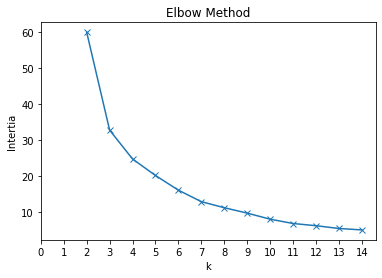

In [11]:
intertia = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    intertia.append(km.inertia_)
    
plt.plot(K, intertia, marker='x')
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

***silhouette score***

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
print(f'Silhouette Score (n=3): {silhouette_score(X, y_kmeans)}')

Silhouette Score (n=3): 0.5052738291206261
